# Data Fetching

### Nous récuperons les données à partir du fichier sqlite et on créeons un fichier csv distincts pour chaque table présente dans la base de donnéees

In [72]:
#IMPORTS
import sqlite3
import pandas as pd
#Enlever les warnings
import warnings
warnings.simplefilter("ignore")

#DATA FETCHING
dat = sqlite3.connect('../database/database.sqlite')

table = ["Country", "League", "X_Train", "X_Test","Player", "Player_Attributes",
         "Team", "Team_Attributes"]

csv = {}

for name in table:
    query = dat.execute("SELECT * From " + name)
    cols = [column[0] for column in query.description]
    results = pd.DataFrame.from_records(data=query.fetchall(), columns=cols)
    results.to_csv(r'../csv/'+name+'.csv')


### Transformation des fichiers csv en dataframes

In [73]:
matchsTrain = pd.read_csv('../csv/X_Train.csv')
matchsTest = pd.read_csv('../csv/X_Test.csv')
players = pd.read_csv('../csv/Player.csv')
teams = pd.read_csv('../csv/Team.csv')
team_attr = pd.read_csv('../csv/Team_Attributes.csv')
player_attr = pd.read_csv('../csv/Player_Attributes.csv')
countries = pd.read_csv('../csv/Country.csv')
leagues = pd.read_csv('../csv/League.csv')

## Exploration des données

#### Exploration du train set

Informations importantes à propos du training : 
- les colonnes home/away_player_XY représentent les coordonnées des X,Y des joueurs sur le terrain
- les colonnes home/away_player_i où 1<i<11 représentent l'api id des joueurs

In [74]:
matchsTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20479 entries, 0 to 20478
Data columns (total 79 columns):
Unnamed: 0          20479 non-null int64
index               20479 non-null int64
id                  20479 non-null int64
country_id          20479 non-null int64
league_id           20479 non-null int64
season              20479 non-null object
stage               20479 non-null int64
date                20479 non-null object
match_api_id        20479 non-null int64
home_team_api_id    20479 non-null int64
away_team_api_id    20479 non-null int64
home_team_goal      20479 non-null int64
away_team_goal      20479 non-null int64
home_player_X1      19033 non-null float64
home_player_X2      19033 non-null float64
home_player_X3      19025 non-null float64
home_player_X4      19025 non-null float64
home_player_X5      19025 non-null float64
home_player_X6      19025 non-null float64
home_player_X7      19025 non-null float64
home_player_X8      19025 non-null float64
home_player_

In [75]:
matchsTrain.describe()

,Unnamed: 0,index,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
count,20479.000000,20479.000000,20479.0000,20479.000000,20479.000000,20479.000000,2.047900e+04,20479.000000,20479.000000,20479.000000,...,19460.000000,19439.000000,19448.000000,19425.000000,19430.000000,19498.000000,19409.000000,19433.000000,19348.000000,19264.000000
mean,10239.000000,10239.000000,13018.8497,11766.815177,11766.815177,18.224132,1.196640e+06,9903.388105,10035.218272,1.538454,...,107215.875231,91067.257729,94952.167935,109937.905071,102434.662120,98161.155247,110213.809418,110629.648948,106639.449245,105447.734064
std,5911.922417,5911.922417,7492.2651,7551.399825,7551.399825,10.398607,4.950166e+05,13529.090615,14554.860615,1.296081,...,113465.530366,101884.382600,103884.329333,112726.177016,111247.146676,107130.925346,117246.374813,116002.144951,112511.966589,110469.160375
min,0.000000,0.000000,2.0000,1.000000,1.000000,1.000000,4.831290e+05,1601.000000,1601.000000,0.000000,...,2790.000000,2752.000000,2752.000000,2790.000000,2625.000000,2625.000000,2625.000000,2625.000000,2802.000000,2802.000000
25%,5119.500000,5119.500000,6540.5000,4769.000000,4769.000000,9.000000,7.684365e+05,8481.000000,8472.000000,1.000000,...,32574.000000,30464.000000,30617.000000,33579.000000,31058.000000,30930.000000,32836.000000,33421.000000,32572.000000,32748.000000
50%,10239.000000,10239.000000,13027.0000,10257.000000,10257.000000,18.000000,1.189713e+06,8697.000000,8696.000000,1.000000,...,42388.000000,39892.000000,41062.000000,46297.000000,41659.000000,41603.500000,46104.000000,45860.000000,45174.000000,43097.000000
75%,15358.500000,15358.500000,19485.5000,17642.000000,17642.000000,27.000000,1.709904e+06,9925.000000,9911.000000,2.000000,...,159854.000000,119007.000000,145561.000000,160243.000000,151079.000000,145538.000000,164031.000000,164089.000000,160194.000000,163205.000000
max,20478.000000,20478.000000,25979.0000,24558.000000,24558.000000,38.000000,2.216672e+06,274581.000000,274581.000000,10.000000,...,748432.000000,705484.000000,728414.000000,746419.000000,722766.000000,750435.000000,717248.000000,722766.000000,722766.000000,726956.000000


In [76]:
matchsTrain.head()

,Unnamed: 0,index,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,...,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
0,0,0,11103,10257,10257,2010/2011,17,2010-12-19 00:00:00,888326,8533,...,231753.0,24235.0,41884.0,34320.0,31314.0,192574.0,27694.0,39232.0,30712.0,39540.0
1,1,1,16167,15722,15722,2009/2010,5,2009-08-29 00:00:00,673737,8245,...,13515.0,13533.0,69261.0,NaN,69599.0,NaN,NaN,NaN,NaN,NaN
2,2,2,11222,10257,10257,2010/2011,28,2011-03-06 00:00:00,888435,9882,...,150466.0,18500.0,25815.0,41380.0,39701.0,39264.0,73999.0,167634.0,39306.0,96598.0
3,3,3,11018,10257,10257,2010/2011,1,2010-08-29 00:00:00,888161,9976,...,27720.0,24235.0,41884.0,41892.0,31314.0,33888.0,41890.0,39232.0,30727.0,39540.0
4,4,4,25596,24558,24558,2013/2014,5,2013-08-10 00:00:00,1471657,9930,...,67349.0,16254.0,25815.0,25843.0,93223.0,113227.0,302079.0,30912.0,25860.0,71764.0


L'api id représente l'id sur lequel on pourra faire un "merge" du training set avec d'autres tables tels que Player Attributs, Team Attributs,...

### Conclusions : 
- En inspectant les premieres lignes du dataframe , on peut s'apercevoir que tous les matchs sont joués entre équipes d'un meme championnat (pas de matchs internationaux ni championnat europeen. Nous allons donc pas utiliser les tables Country et League


## Injection des attributs des differentes tables dans le training set (Visualisation des correlation entre differents attributs des differentes tables)

### Ajout du label

In [77]:
# Determine the label of the match (0: tie , 1: home team won, -1: home team lost)
def det_label(score1, score2):
    if(score1 == score2):
        return 0
    if(score1 < score2):
        return -1
    else:
        return 1


In [78]:
#On va travailler sur une copie du training set
matchsTrainCopy = matchsTrain.copy()
matchsTrainCopy['label'] = matchsTrainCopy.apply(lambda row: det_label(
            row['home_team_goal'], row['away_team_goal']), axis=1)

In [79]:
matchsTrainCopy['label'].value_counts()

 1    9367
-1    5939
 0    5173
Name: label, dtype: int64

Nous pouvons voir que l'équipe jouant à domicile gagne dans un peu moins de 50% des cas

### Exploration des attributes des équipes

Pour mieux visualiser les attributs liés aux équipes nous allons drop les attributs liés aux joueurs

In [80]:
matchsTrainCopy.drop(matchsTrainCopy.select(lambda col: col.startswith('home_player'), axis=1), axis=1, inplace=True)
matchsTrainCopy.drop(matchsTrainCopy.select(lambda col: col.startswith('away_player'), axis=1), axis=1, inplace=True)

In [81]:
matchsTrainCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20479 entries, 0 to 20478
Data columns (total 14 columns):
Unnamed: 0          20479 non-null int64
index               20479 non-null int64
id                  20479 non-null int64
country_id          20479 non-null int64
league_id           20479 non-null int64
season              20479 non-null object
stage               20479 non-null int64
date                20479 non-null object
match_api_id        20479 non-null int64
home_team_api_id    20479 non-null int64
away_team_api_id    20479 non-null int64
home_team_goal      20479 non-null int64
away_team_goal      20479 non-null int64
label               20479 non-null int64
dtypes: int64(12), object(2)
memory usage: 2.2+ MB


### Merge du training set avec le team attributes

In [82]:
mergedDf = matchsTrainCopy.merge(team_attr, left_on='home_team_api_id', right_on='team_api_id')
correlation = mergedDf.corrwith(mergedDf['label']).sort_values(ascending=False)

In [83]:
mergedDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111926 entries, 0 to 111925
Data columns (total 40 columns):
Unnamed: 0_x                      111926 non-null int64
index                             111926 non-null int64
id_x                              111926 non-null int64
country_id                        111926 non-null int64
league_id                         111926 non-null int64
season                            111926 non-null object
stage                             111926 non-null int64
date_x                            111926 non-null object
match_api_id                      111926 non-null int64
home_team_api_id                  111926 non-null int64
away_team_api_id                  111926 non-null int64
home_team_goal                    111926 non-null int64
away_team_goal                    111926 non-null int64
label                             111926 non-null int64
Unnamed: 0_y                      111926 non-null int64
id_y                              111926 non-nu

In [84]:
correlation

label                     1.000000
home_team_goal            0.620438
defencePressure           0.063225
chanceCreationShooting    0.035975
defenceAggression         0.030697
defenceTeamWidth          0.022133
chanceCreationPassing     0.019822
chanceCreationCrossing    0.016655
away_team_api_id          0.016592
buildUpPlayDribbling      0.007554
index                     0.005943
Unnamed: 0_x              0.005943
league_id                 0.001719
country_id                0.001719
id_x                     -0.000900
stage                    -0.002491
buildUpPlaySpeed         -0.006341
team_api_id              -0.014515
home_team_api_id         -0.014515
match_api_id             -0.025879
id_y                     -0.026587
Unnamed: 0_y             -0.026587
team_fifa_api_id         -0.039668
buildUpPlayPassing       -0.065467
away_team_goal           -0.630108
dtype: float64

In [85]:
mergedDf = mergedDf.dropna(how="any")

Avec SelectKBest

In [86]:
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
dfCopy = mergedDf.select_dtypes(['float64','int64'])

X = dfCopy.drop(dfCopy[['label']], axis=1)  
y = dfCopy['label']  
#On applique SelectKBest pour extraire les 10 meilleurs features
skb = SelectKBest(score_func=f_classif, k=10)
fit = skb.fit(X,y)
scores = pd.DataFrame(fit.scores_) #On recupere le score
columns = pd.DataFrame(X.columns) # On recupere le nom des colonnes
#On concatene les 2 dataframes pour visualiser 
result = pd.concat([columns,scores],axis=1)
result.columns = ['Features','Score']
print(result.nlargest(10,'Score')) 

                  Features         Score
10          away_team_goal  13596.478294
9           home_team_goal  13240.248401
21         defencePressure    146.200915
22       defenceAggression    141.716514
17      buildUpPlayPassing    130.535667
13        team_fifa_api_id     37.315128
6             match_api_id     24.228487
23        defenceTeamWidth     24.225555
15        buildUpPlaySpeed     13.894917
19  chanceCreationCrossing     12.782949


#### Conclusion : 
- les deux colonnes qui se disinguent le plus par leurs correlations au label sont la defensePressure et le buildUpPlayPassing

### Merge du training set avec le player attributes

In [87]:
#On va travailler sur une copie du training set
matchsTrainCopy = matchsTrain.copy()
matchsTrainCopy['label'] = matchsTrainCopy.apply(lambda row: det_label(
            row['home_team_goal'], row['away_team_goal']), axis=1)

In [88]:
player_attr_home = player_attr.select_dtypes(include=['float64', 'int64'])
player_attr_away = player_attr.select_dtypes(include=['float64', 'int64'])
player_attr_home = player_attr.add_suffix('_home')
player_attr_away = player_attr.add_suffix('_away')

player_attr_home = player_attr_home.groupby(player_attr_home['player_api_id_home']).mean()
player_attr_away = player_attr_away.groupby(player_attr_away['player_api_id_away']).mean()

player_attr_home['player_api_id_home'] = player_attr_home.index
player_attr_away['player_api_id_away'] = player_attr_away.index


matchsTrainCopy = matchsTrainCopy.select_dtypes(include=['float64', 'int64'])

mergedDf = matchsTrainCopy.merge(
    player_attr_home, left_on='home_player_1', right_index=True)
mergedDf = matchsTrainCopy.merge(
    player_attr_away, left_on='away_player_1', right_index=True)

for i in range(2, 12):
    player_attr_home = player_attr.add_suffix('_'+str(i))
    player_attr_away = player_attr.add_suffix('_'+str(i))
    mergedDf = mergedDf.merge(
        player_attr_home, left_on='home_player_'+str(i), right_index=True)
    mergedDf = mergedDf.merge(
        player_attr_away, left_on='away_player_'+str(i), right_index=True)

correlation = mergedDf.corrwith(mergedDf['label']).sort_values(ascending=False)

In [89]:
correlation

label                      1.000000
home_team_goal             0.611912
marking_away               0.073126
player_fifa_api_id_away    0.061488
home_player_X11            0.061105
strength_11_x              0.055515
overall_rating_11_x        0.052679
home_player_Y9             0.049421
crossing_away              0.048339
finishing_away             0.048226
sliding_tackle_away        0.047102
penalties_2_y              0.046931
jumping_11_x               0.046804
sliding_tackle_10_y        0.046777
home_player_Y10            0.045697
gk_kicking_11_x            0.045577
gk_reflexes_11_x           0.045308
away_player_X9             0.044917
id_10_y                    0.044691
away_player_10             0.044691
Unnamed: 0_10_y            0.044691
long_shots_away            0.043733
jumping_3_x                0.043245
standing_tackle_away       0.043108
standing_tackle_10_y       0.042946
interceptions_7_x          0.041319
balance_2_y                0.040768
gk_handling_11_x           0

In [90]:
mergedDf = mergedDf.dropna(how="any")

Avec SelectKBest

In [91]:
dfCopy = mergedDf.select_dtypes(['float64','int64'])

X = dfCopy.drop(dfCopy[['label']], axis=1)  
y = dfCopy['label']  
#On applique SelectKBest pour extraire les 10 meilleurs features
skb = SelectKBest(score_func=f_classif, k=10)
fit = skb.fit(X,y)
scores = pd.DataFrame(fit.scores_) #On recupere le score
columns = pd.DataFrame(X.columns) # On recupere le nom des colonnes
#On concatene les 2 dataframes pour visualiser 
result = pd.concat([columns,scores],axis=1)
result.columns = ['Features','Score']
print(result.nlargest(10,'Score')) 

                Features        Score
10        away_team_goal  1179.425072
9         home_team_goal  1050.922513
80   overall_rating_away    37.437325
111     gk_handling_away    36.776956
113  gk_positioning_away    33.367254
81        potential_away    32.850879
110       gk_diving_away    31.427319
114     gk_reflexes_away    28.347739
95        reactions_away    19.460588
112      gk_kicking_away    18.358540


### Conclusion:
- les attributs du gardien de l'équipe à l'extérieur ont une legere correlation inverse sur le label (au plus le gardien a de bons attributs au plus le label sera -1 cad l'équipe à l'extérieur remporte le match)
- En générale, il parait logique de se dire que les attributs des joueurs en générale vont affluer sur le resultat final d'un match (au plus une équipe a de bons joueurs par rapport à l'equipe adverse, au plus elle augmentera ses chances de gagner le match 

# Data Cleaning

In [92]:
#Import pour la visualisation des données
import seaborn as sns 
import matplotlib.pyplot as plt

In [93]:
matchsTrainCopy = matchsTrain.copy()
matchsTrainCopy['label'] = matchsTrainCopy.apply(lambda row: det_label(
            row['home_team_goal'], row['away_team_goal']), axis=1)

In [94]:
#Suppression des colonnes qui n'ont pas d'importances et que l'on ne va pas exploiter
matchsTrainCopy.drop(['country_id', 'league_id','match_api_id', 'Unnamed: 0'], axis=1, inplace=True)

L'attribut match_api_id est en relation avec l'id et l'attribut Unnamed: 0 est une copie de l'id. Ils nous sont pas consequent pas utils.

## Cleaning des valeurs Nan présentent dans le training set

In [95]:
matchsTrainCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20479 entries, 0 to 20478
Data columns (total 76 columns):
index               20479 non-null int64
id                  20479 non-null int64
season              20479 non-null object
stage               20479 non-null int64
date                20479 non-null object
home_team_api_id    20479 non-null int64
away_team_api_id    20479 non-null int64
home_team_goal      20479 non-null int64
away_team_goal      20479 non-null int64
home_player_X1      19033 non-null float64
home_player_X2      19033 non-null float64
home_player_X3      19025 non-null float64
home_player_X4      19025 non-null float64
home_player_X5      19025 non-null float64
home_player_X6      19025 non-null float64
home_player_X7      19025 non-null float64
home_player_X8      19025 non-null float64
home_player_X9      19025 non-null float64
home_player_X10     19025 non-null float64
home_player_X11     19025 non-null float64
away_player_X1      19025 non-null float64
away

Nous pouvons voir qu'il nous manque des données seulement dans les colonnes home/away_player_i et home/away_player_XYi où 1<i<11

Pour nettoyer les valeurs Nan , nous allons procéder par remplissage. Nous pouvons aussi supprimer les lignes mais ceci entrainera à une énorme réduction du training set. La suppression des colonnes est inconcevable ici.

In [96]:
#Nombre de lignes apres la suppresion de toutes les lignes où un Nan est present
matchsTrainCopy.dropna(how='any').shape[0]

16816

### Remplissage des colonnes home/away_player_i

Pour remplir les id des joueurs, le seul cas possible est le remplissage par 0. Le remplissage par la valeurs la plus récurrente ou la médiane n'ont pas de sens 

In [97]:
#Nous remplissons les ids des joureurs manquants par 0
matchsTrainCopy[['home_player_'+str(i) for i in range(1,12)]].fillna(0)
matchsTrainCopy[['away_player_'+str(i) for i in range(1,12)]].fillna(0)


,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
0,27615.0,231753.0,24235.0,41884.0,34320.0,31314.0,192574.0,27694.0,39232.0,30712.0,39540.0
1,0.0,13515.0,13533.0,69261.0,0.0,69599.0,0.0,0.0,0.0,0.0,0.0
2,41243.0,150466.0,18500.0,25815.0,41380.0,39701.0,39264.0,73999.0,167634.0,39306.0,96598.0
3,27615.0,27720.0,24235.0,41884.0,41892.0,31314.0,33888.0,41890.0,39232.0,30727.0,39540.0
4,25947.0,67349.0,16254.0,25815.0,25843.0,93223.0,113227.0,302079.0,30912.0,25860.0,71764.0
5,156175.0,458806.0,705484.0,22834.0,181211.0,438780.0,114738.0,25794.0,34035.0,402975.0,527103.0
6,30974.0,33792.0,41071.0,41060.0,41068.0,25382.0,32455.0,30851.0,32448.0,25643.0,32826.0
7,50669.0,27678.0,27785.0,41501.0,0.0,30920.0,49940.0,39738.0,41865.0,27663.0,39502.0
8,13473.0,315793.0,128230.0,444186.0,0.0,131980.0,169520.0,0.0,310192.0,69227.0,168232.0
9,0.0,68937.0,94280.0,291646.0,278153.0,309868.0,0.0,0.0,169520.0,363343.0,0.0


### Remplissage des colonnes home/away_player_XYi où 1<i<11

Pour remplir les coordonnées des joueurs , nous allons proceder par le remplissage par la valeur la plus récurrente. C'est le cas qui a le plus de sens lorsque l'on y regarde de plus pres. En effet, ...

In [98]:
# Les coordonnées des joueurs (seuls données manquantes de la dataframe), 
# nous les remplissons par les valeurs qui reviennent le plus (mode)

matchsTrainCopy = matchsTrainCopy.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [99]:
matchsTrainCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20479 entries, 0 to 20478
Data columns (total 76 columns):
index               20479 non-null int64
id                  20479 non-null int64
season              20479 non-null object
stage               20479 non-null int64
date                20479 non-null object
home_team_api_id    20479 non-null int64
away_team_api_id    20479 non-null int64
home_team_goal      20479 non-null int64
away_team_goal      20479 non-null int64
home_player_X1      20479 non-null float64
home_player_X2      20479 non-null float64
home_player_X3      20479 non-null float64
home_player_X4      20479 non-null float64
home_player_X5      20479 non-null float64
home_player_X6      20479 non-null float64
home_player_X7      20479 non-null float64
home_player_X8      20479 non-null float64
home_player_X9      20479 non-null float64
home_player_X10     20479 non-null float64
home_player_X11     20479 non-null float64
away_player_X1      20479 non-null float64
away

Il n'y a plus aucune valeur nulle

# Data Preparing (Engineering)

## Exploitation des coordonnées XY des joueurs

L'idée ici sera de transformer les coordonnées Y (nous n'allons pas utiliser les coordonnées X) en formation par exemple 442 

In [100]:
matchsTrainCopy.drop(matchsTrainCopy.select(lambda col: col.startswith('home_player_X'), axis=1), axis=1, inplace=True)
matchsTrainCopy.drop(matchsTrainCopy.select(lambda col: col.startswith('away_player_X'), axis=1), axis=1, inplace=True)

In [101]:
#Pour l'exemple, voici la premiere ligne du training set
matchsTrainCopy[['home_player_Y'+str(i) for i in range(1,12)]].iloc[0,:]

home_player_Y1      1.0
home_player_Y2      3.0
home_player_Y3      3.0
home_player_Y4      3.0
home_player_Y5      3.0
home_player_Y6      5.0
home_player_Y7      5.0
home_player_Y8      5.0
home_player_Y9      8.0
home_player_Y10    10.0
home_player_Y11    10.0
Name: 0, dtype: float64

##### Nous allons compter les occurences des joueurs presents par lignes. Par exemple ici :
- 1 joueur sur la ligne 1 (le gardien)
- 4 joueurs sur la ligne 3 (defenseurs)
- 3 joueurs sur la ligne 5 (milieux)
- 1 joueur sur la ligne 8 (milieu-offensif)
- 2 joueurs sur la ligne 10 (attaquants)
Ce qui donne 4312 (les formations ne prennent pas en compte le gardien car il ne change jamais de place)

In [102]:
from collections import Counter
#Fonction pour creer une formation apd des coordonnées Y des joureurs
def create_formation(row, home):
    list_form = list()  # Nous avons besoin d'une liste pour le Counter
    if(home):
        list_form = row.loc[row.index.str.startswith('home_player_Y')].tolist()[1:]  # Nous ne prenons pas le gardien
    else:
        list_form = row.loc[row.index.str.startswith('away_player_Y')].tolist()[1:]
        
    # Nous creeons un dictionnaire avec les occurences des positions des joueurs
    couter = Counter(list_form)
    couter_val = couter.values()
    # on concatene les valeurs pour arriver à la formation par ex : 442
    form = ''.join((str(e) for e in list(couter_val)))
    return form

In [103]:
matchsTrainCopy['form_home'] = matchsTrainCopy.apply(lambda x: create_formation(x, True), axis=1)
matchsTrainCopy['form_away'] = matchsTrainCopy.apply(lambda x: create_formation(x, False), axis=1)

In [104]:
matchsTrainCopy['form_home'].value_counts()

442      6472
4231     5037
433      3428
451       763
4411      705
4312      555
352       530
4141      484
41212     455
4222      423
41221     301
343       227
4321      226
4132      202
532       149
3421      135
3412      112
3511      101
4123       66
541        52
4213       30
1342        8
3232        7
3331        5
42112       3
5311        1
42211       1
631         1
Name: form_home, dtype: int64

In [105]:
matchsTrainCopy['form_away'].value_counts()

442      6231
4231     5054
433      3438
451       968
4411      670
352       557
4141      550
4312      485
4222      428
41212     388
41221     281
4321      243
343       232
4132      196
532       143
3421      133
3511      117
541       116
3412      115
4123       75
4213       27
3232       14
3331        9
5311        2
42112       2
41122       1
145         1
33211       1
31312       1
32311       1
Name: form_away, dtype: int64

In [106]:
#On drop les coordonnées Y
matchsTrainCopy.drop(matchsTrainCopy.select(lambda col: col.startswith('home_player_Y'), axis=1), axis=1, inplace=True)
matchsTrainCopy.drop(matchsTrainCopy.select(lambda col: col.startswith('away_player_Y'), axis=1), axis=1, inplace=True)

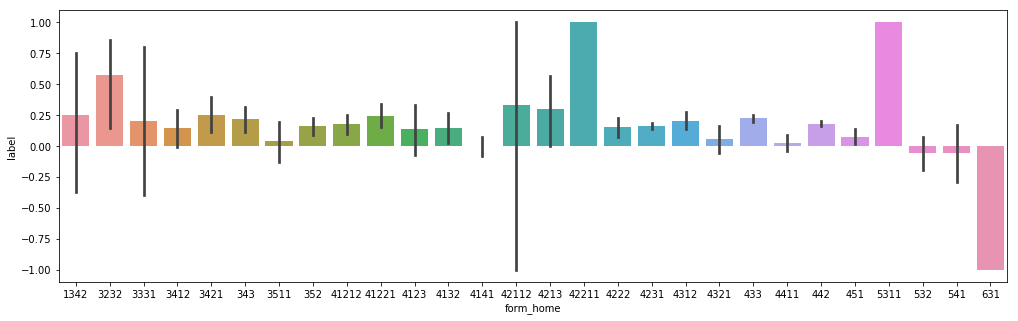

In [107]:
#Graphique des formations à domicile en fonction du label
plt.figure(figsize=(17,5))
sns.barplot(x='form_home', y='label',data=matchsTrainCopy)

Explication: Nous pouvons voir que suivant certaine formations le label a tendance a être plus élevé. C'est à dire que suivant une certaine formation, une équipe aura plus de probailité de gagner un match

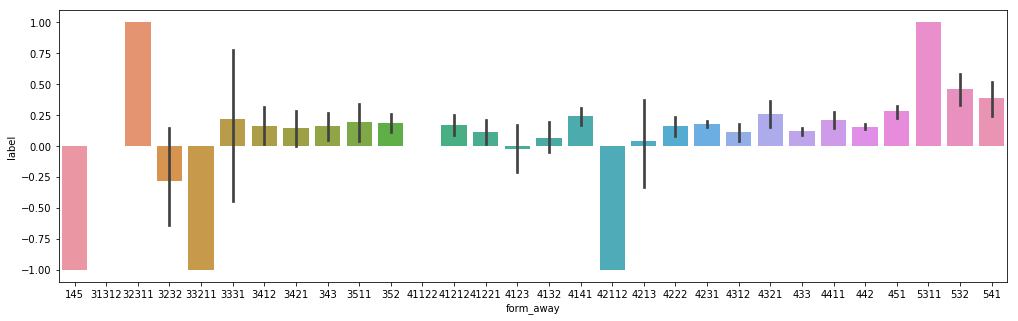

In [108]:
#Graphique des formations à l'extérieur en fonction du label
plt.figure(figsize=(17,5))
sns.barplot(x='form_away', y='label',data=matchsTrainCopy)

## Ajout des notes générales des joueurs

Pour ajouter les notes des joueurs, nous allons créer un dictionnaire avec comme clé un tuple avec l'api id et la date et comme valeur sa note générale ( En effet, la note d'un joueur varie en fonction du temps et un même joueur a donc plusieurs notes dans la table Players Attributes

In [109]:
def create_player_overall_dict(player_attr):
    ply_attr = player_attr[['player_api_id', 'overall_rating', 'date']]
    ply_attr['date'] = ply_attr['date'].apply(lambda x: x.split('-')[0]) # on retient seulement l'année
    ply_attr = ply_attr.groupby([ply_attr['player_api_id'], ply_attr['date']]).mean()

    return ply_attr.to_dict()['overall_rating']

ply_attr_overall_dict = create_player_overall_dict(player_attr)

Dans la table Players Attributs, il est possible qu'un joueur n'ai pas une note à une certaine date. Ce qui va provoquer un crash lorsqu'on voudra acceder à cette clé là (id,date)

In [110]:
def dict_key_checker(attr_dict, api_id, date):
    if(api_id == 0):
        return 0
    try:
        res = attr_dict[(api_id, str(date))]
    except KeyError:
        date = int(date)
        dates = [int(k[1]) for k in attr_dict if k[0] == api_id]
        if not dates:  # si l'api id n'est pas présente dans le dictionnaire
            return 0
        res = attr_dict[(api_id, str(min(dates, key=lambda key: abs(key-date))))] # si la date est pas présente , 
        #on prend la date la plus proche
    return res

In [111]:
for i in range(1, 12):
    matchsTrainCopy['home_player_overall_'+str(i)] = matchsTrainCopy.apply(lambda x: 
            dict_key_checker(ply_attr_overall_dict, int(x['home_player_'+str(i)]), x['date'].split('-')[0])/99, axis=1)
    matchsTrainCopy['away_player_overall_'+str(i)] = matchsTrainCopy.apply(lambda x: 
            dict_key_checker(ply_attr_overall_dict, int(x['away_player_'+str(i)]), x['date'].split('-')[0])/99, axis=1)

Nous divisons la note par 99 car la note générale est une note entre 0 et 99. Ca nous permettera déjà de normaliser la note et se retrouver avec une valeur entre 0 et 1

In [112]:
matchsTrainCopy.head()

,index,id,season,stage,date,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_1,...,home_player_overall_7,away_player_overall_7,home_player_overall_8,away_player_overall_8,home_player_overall_9,away_player_overall_9,home_player_overall_10,away_player_overall_10,home_player_overall_11,away_player_overall_11
0,0,11103,2010/2011,17,2010-12-19 00:00:00,8533,9885,1,1,39477.0,...,0.727273,0.606061,0.747475,0.803030,0.696970,0.792929,0.777778,0.818182,0.686869,0.823232
1,1,16167,2009/2010,5,2009-08-29 00:00:00,8245,2186,1,1,13471.0,...,0.777778,0.727273,0.646465,0.767677,0.636364,0.787879,0.722222,0.893939,0.863636,0.777778
2,2,11222,2010/2011,28,2011-03-06 00:00:00,9882,9880,2,3,27691.0,...,0.782828,0.722222,0.717172,0.732323,0.747475,0.767677,0.752525,0.782828,0.732323,0.696970
3,3,11018,2010/2011,1,2010-08-29 00:00:00,9976,9885,1,0,41818.0,...,0.757576,0.777778,0.707071,0.808081,0.727273,0.792929,0.696970,0.823232,0.787879,0.823232
4,4,25596,2013/2014,5,2013-08-10 00:00:00,9930,10192,0,4,67374.0,...,0.601010,0.640693,0.626263,0.696970,0.572391,0.654545,0.612795,0.660895,0.851515,0.704545


In [113]:
matchsTrainCopy.corrwith(matchsTrainCopy['label']).sort_values(ascending=False)[1:]

home_team_goal            0.620839
home_player_overall_7     0.153311
home_player_overall_8     0.145521
home_player_overall_11    0.144683
home_player_overall_3     0.142765
home_player_overall_5     0.141492
home_player_overall_2     0.140775
home_player_overall_9     0.140008
home_player_overall_4     0.138448
home_player_overall_6     0.137211
home_player_overall_10    0.131809
home_player_overall_1     0.126671
away_player_1             0.024024
away_player_3             0.016283
away_player_10            0.014090
away_team_api_id          0.013994
away_player_11            0.011715
away_player_8             0.011287
away_player_7             0.011281
away_player_2             0.011142
away_player_5             0.007451
away_player_6             0.005934
index                     0.002380
away_player_4             0.001284
stage                    -0.000140
away_player_9            -0.000236
id                       -0.011120
home_player_9            -0.017475
home_player_4       

## Ajout du potentiel des joueurs

Nous recommencons la meme manipulation pour ajouter le potentiel des joueurs

In [114]:
def create_player_pot_dict(player_attr):
    ply_attr = player_attr[['player_api_id', 'potential', 'date']]
    ply_attr['date'] = ply_attr['date'].apply(lambda x: x.split('-')[0])
    ply_attr = ply_attr.groupby([ply_attr['player_api_id'], ply_attr['date']]).mean()

    return ply_attr.to_dict()['potential']

ply_attr_pot_dict = create_player_pot_dict(player_attr)

for i in range(1, 12):
    matchsTrainCopy['home_player_potential_'+str(i)] = matchsTrainCopy.apply(lambda x: 
        dict_key_checker(ply_attr_pot_dict, int(x['home_player_'+str(i)]), x['date'].split('-')[0])/99, axis=1)
    matchsTrainCopy['away_player_potential_'+str(i)] = matchsTrainCopy.apply(lambda x: 
        dict_key_checker(ply_attr_pot_dict, int(x['away_player_'+str(i)]), x['date'].split('-')[0])/99, axis=1)

In [115]:
matchsTrainCopy.corrwith(matchsTrainCopy['label']).sort_values(ascending=False)[1:]

home_team_goal              0.620839
home_player_overall_7       0.153311
home_player_potential_11    0.153011
home_player_potential_8     0.150988
home_player_potential_7     0.146234
home_player_overall_8       0.145521
home_player_overall_11      0.144683
home_player_potential_4     0.143203
home_player_potential_9     0.143035
home_player_overall_3       0.142765
home_player_potential_10    0.142213
home_player_overall_5       0.141492
home_player_potential_5     0.141276
home_player_overall_2       0.140775
home_player_potential_3     0.140220
home_player_overall_9       0.140008
home_player_overall_4       0.138448
home_player_potential_2     0.137440
home_player_overall_6       0.137211
home_player_potential_6     0.133960
home_player_overall_10      0.131809
home_player_potential_1     0.129822
home_player_overall_1       0.126671
away_player_1               0.024024
away_player_3               0.016283
away_player_10              0.014090
away_team_api_id            0.013994
a

## Ajout des attributs defensePressure et le buildUpPlayPassing 

In [116]:
def create_team_attr_dict(teams_attr, key):
    tms_attr = teams_attr[['team_api_id', 'date','defencePressure', 'buildUpPlayPassing']]
    tms_attr['date'] = tms_attr['date'].apply(lambda x: x.split('-')[0])
    tms_attr = tms_attr.groupby([tms_attr['team_api_id'], tms_attr['date']]).mean()
    return tms_attr.to_dict()[key]

teams_buildUp_dict = create_team_attr_dict(team_attr, 'buildUpPlayPassing')
teams_def_press_dict = create_team_attr_dict(team_attr, 'defencePressure')

matchsTrainCopy['home_build_up'] = matchsTrainCopy.apply(lambda x: 
        dict_key_checker(teams_buildUp_dict, x['home_team_api_id'], x['date'].split('-')[0])/99, axis=1)
matchsTrainCopy['away_build_up'] = matchsTrainCopy.apply(lambda x: 
        dict_key_checker(teams_buildUp_dict, x['away_team_api_id'], x['date'].split('-')[0])/99, axis=1)
matchsTrainCopy['home_def_press'] = matchsTrainCopy.apply(lambda x: 
        dict_key_checker(teams_def_press_dict, x['home_team_api_id'], x['date'].split('-')[0])/99, axis=1)
matchsTrainCopy['away_def_press'] = matchsTrainCopy.apply(lambda x: 
        dict_key_checker(teams_def_press_dict, x['away_team_api_id'], x['date'].split('-')[0])/99, axis=1)

In [117]:
matchsTrainCopy.corrwith(matchsTrainCopy['label']).sort_values(ascending=False)[1:]

home_team_goal              0.620839
home_player_overall_7       0.153311
home_player_potential_11    0.153011
home_player_potential_8     0.150988
home_player_potential_7     0.146234
home_player_overall_8       0.145521
home_player_overall_11      0.144683
home_player_potential_4     0.143203
home_player_potential_9     0.143035
home_player_overall_3       0.142765
home_player_potential_10    0.142213
home_player_overall_5       0.141492
home_player_potential_5     0.141276
home_player_overall_2       0.140775
home_player_potential_3     0.140220
home_player_overall_9       0.140008
home_player_overall_4       0.138448
home_player_potential_2     0.137440
home_player_overall_6       0.137211
home_player_potential_6     0.133960
home_player_overall_10      0.131809
home_player_potential_1     0.129822
home_player_overall_1       0.126671
home_def_press              0.065244
away_build_up               0.034656
away_player_1               0.024024
away_player_3               0.016283
a

## Exploitation des notes générales / potentiel des joueurs et de la formation

Une idée que l'on pourrait avoir pour réduire le nombre de colonnes du training set est, grace à la formation, de faire une moyenne des notes d'une équipe par ligne ( défense , milieu et attaque)  

In [118]:
def get_nbr_players_by_lines(form):
    list_form = list(form)
    list_form = [int(x) for x in list_form]
    defenders = list_form[0] + 1  # le nombre de joueur sur la premiere ligne de la formation plus le gardien
    attackers = list_form[-1] # le nombre de joueur sur la derniere ligne de la formation
    midfielders = sum(list_form[1:-1]) # la somme des joueurs entre les ligne de defense et d'attaque
    return defenders, midfielders, attackers

In [119]:
for index, row in matchsTrainCopy.iterrows():
    nbr_def_home, nbr_mid_home, nbr_att_home = get_nbr_players_by_lines(row['form_home'])
    nbr_def_away, nbr_mid_away, nbr_att_away = get_nbr_players_by_lines(row['form_away'])

    # Overall
    matchsTrainCopy.loc[index, 'home_def_overall'] = row.loc[[
                'home_player_overall_' + str(i) for i in range(1, nbr_def_home+1)]].mean()
    matchsTrainCopy.loc[index, 'home_mid_overall'] = row.loc[[
                'home_player_overall_' + str(i) for i in range(nbr_def_home+1, nbr_def_home + nbr_mid_home+1)]].mean()
    matchsTrainCopy.loc[index, 'home_att_overall'] = row.loc[[
                'home_player_overall_' + str(i) for i in range(nbr_def_home + nbr_mid_home+1, 12)]].mean()

    matchsTrainCopy.loc[index, 'away_def_overall'] = row.loc[[
                'away_player_overall_' + str(i) for i in range(1, nbr_def_away+1)]].mean()
    matchsTrainCopy.loc[index, 'away_mid_overall'] = row.loc[[
                'away_player_overall_' + str(i) for i in range(nbr_def_away+1, nbr_def_away + nbr_mid_away+1)]].mean()
    matchsTrainCopy.loc[index, 'away_att_overall'] = row.loc[[
                'away_player_overall_' + str(i) for i in range(nbr_def_away + nbr_mid_away+1, 12)]].mean()


    # Potential
    matchsTrainCopy.loc[index, 'home_def_pot'] = row.loc[[
        'home_player_potential_' + str(i) for i in range(1, nbr_def_home+1)]].mean()
    matchsTrainCopy.loc[index, 'home_mid_pot'] = row.loc[[
        'home_player_potential_' + str(i) for i in range(nbr_def_home+1, nbr_def_home + nbr_mid_home+1)]].mean()
    matchsTrainCopy.loc[index, 'home_att_pot'] = row.loc[[
        'home_player_potential_' + str(i) for i in range(nbr_def_home + nbr_mid_home+1, 12)]].mean()

    matchsTrainCopy.loc[index, 'away_def_pot'] = row.loc[[
        'away_player_potential_' + str(i) for i in range(1, nbr_def_away+1)]].mean()
    matchsTrainCopy.loc[index, 'away_mid_pot'] = row.loc[[
        'away_player_potential_' + str(i) for i in range(nbr_def_away+1, nbr_def_away + nbr_mid_away+1)]].mean()
    matchsTrainCopy.loc[index, 'away_att_pot'] = row.loc[[
        'away_player_potential_' + str(i) for i in range(nbr_def_away + nbr_mid_away+1, 12)]].mean()


In [120]:
#On supprime les colonnes qui ne nous serviront plus
matchsTrainCopy.drop(matchsTrainCopy.select(lambda col: col.startswith('home_player'), axis=1), axis=1, inplace=True)
matchsTrainCopy.drop(matchsTrainCopy.select(lambda col: col.startswith('away_player'), axis=1), axis=1, inplace=True)

In [121]:
matchsTrainCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20479 entries, 0 to 20478
Data columns (total 28 columns):
index               20479 non-null int64
id                  20479 non-null int64
season              20479 non-null object
stage               20479 non-null int64
date                20479 non-null object
home_team_api_id    20479 non-null int64
away_team_api_id    20479 non-null int64
home_team_goal      20479 non-null int64
away_team_goal      20479 non-null int64
label               20479 non-null int64
form_home           20479 non-null object
form_away           20479 non-null object
home_build_up       20479 non-null float64
away_build_up       20479 non-null float64
home_def_press      20479 non-null float64
away_def_press      20479 non-null float64
home_def_overall    20479 non-null float64
home_mid_overall    20479 non-null float64
home_att_overall    20479 non-null float64
away_def_overall    20479 non-null float64
away_mid_overall    20479 non-null float64
away_att

In [122]:
matchsTrainCopy.corrwith(matchsTrainCopy['label']).sort_values(ascending=False)[1:]

home_team_goal      0.620839
home_mid_pot        0.173960
home_mid_overall    0.173752
home_def_pot        0.165638
home_def_overall    0.164527
home_att_pot        0.157358
home_att_overall    0.156274
home_def_press      0.065244
away_build_up       0.034656
away_team_api_id    0.013994
index               0.002380
stage              -0.000140
id                 -0.011120
home_team_api_id   -0.021259
home_build_up      -0.061913
away_def_press     -0.075975
away_att_pot       -0.118771
away_def_pot       -0.120745
away_att_overall   -0.122446
away_def_overall   -0.123053
away_mid_pot       -0.141840
away_mid_overall   -0.144188
away_team_goal     -0.633301
dtype: float64

Nous pouvons voir que nous avons augmenté le score des correlations des notes géneraux de joueurs ainsi que leur potentiel en prennant les joueurs par ligne de champs!

## Rapport entre les attributs de l'équipe à domicile et à l'extérieur

L'idée ici sera d'effectuer un rapport (une difference) entre les colonnes des differents attributs des équipes domicile et extérieur. En effet cette difference, si elle est positif représentera une correlation positive avec le label , si négative une correlation négative

In [123]:
#Difference entre les 2 defenses , les 2 milieux et les 2 attaques
matchsTrainCopy['diff_def_overall'] = matchsTrainCopy['home_def_overall'] - matchsTrainCopy['away_def_overall']
matchsTrainCopy['diff_mid_overall'] = matchsTrainCopy['home_mid_overall'] - matchsTrainCopy['away_mid_overall']
matchsTrainCopy['diff_att_overall'] = matchsTrainCopy['home_att_overall'] - matchsTrainCopy['away_att_overall']

#Difference entre les ligne à confrontation direct c'est à dire l'attaque de l'équipe à domicile contre la defence 
# de l'équipe à l'extérieur ainsi que la defence domicile contre l'attaque extérieur
matchsTrainCopy['diff_att_home_def_away'] = matchsTrainCopy['home_att_overall'] - matchsTrainCopy['away_def_overall']
matchsTrainCopy['diff_def_home_att_away'] = matchsTrainCopy['home_def_overall'] - matchsTrainCopy['away_att_overall']

#Idem pour le potentiel
matchsTrainCopy['diff_def_pot'] = matchsTrainCopy['home_def_pot'] - matchsTrainCopy['away_def_pot']
matchsTrainCopy['diff_mid_pot'] = matchsTrainCopy['home_mid_pot'] - matchsTrainCopy['away_mid_pot']
matchsTrainCopy['diff_att_pot'] = matchsTrainCopy['home_att_pot'] - matchsTrainCopy['away_att_pot']

#Difference entre les 2 attributs d'equipe defensePressure et le buildUpPlayPassing
matchsTrainCopy['diff_build_up'] = matchsTrainCopy['home_build_up'] - matchsTrainCopy['away_build_up']
matchsTrainCopy['diff_def_press'] = matchsTrainCopy['home_def_press'] - matchsTrainCopy['away_def_press']


In [124]:
matchsTrainCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20479 entries, 0 to 20478
Data columns (total 38 columns):
index                     20479 non-null int64
id                        20479 non-null int64
season                    20479 non-null object
stage                     20479 non-null int64
date                      20479 non-null object
home_team_api_id          20479 non-null int64
away_team_api_id          20479 non-null int64
home_team_goal            20479 non-null int64
away_team_goal            20479 non-null int64
label                     20479 non-null int64
form_home                 20479 non-null object
form_away                 20479 non-null object
home_build_up             20479 non-null float64
away_build_up             20479 non-null float64
home_def_press            20479 non-null float64
away_def_press            20479 non-null float64
home_def_overall          20479 non-null float64
home_mid_overall          20479 non-null float64
home_att_overall          204

In [126]:
matchsTrainCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20479 entries, 0 to 20478
Data columns (total 38 columns):
index                     20479 non-null int64
id                        20479 non-null int64
season                    20479 non-null object
stage                     20479 non-null int64
date                      20479 non-null object
home_team_api_id          20479 non-null int64
away_team_api_id          20479 non-null int64
home_team_goal            20479 non-null int64
away_team_goal            20479 non-null int64
label                     20479 non-null int64
form_home                 20479 non-null object
form_away                 20479 non-null object
home_build_up             20479 non-null float64
away_build_up             20479 non-null float64
home_def_press            20479 non-null float64
away_def_press            20479 non-null float64
home_def_overall          20479 non-null float64
home_mid_overall          20479 non-null float64
home_att_overall          204

In [127]:
matchsTrainCopy.corrwith(matchsTrainCopy['label']).sort_values(ascending=False)[1:]

home_team_goal            0.620839
diff_mid_overall          0.328612
diff_def_overall          0.319181
diff_mid_pot              0.319120
diff_def_pot              0.311694
diff_def_home_att_away    0.289217
diff_att_home_def_away    0.263353
diff_att_pot              0.262062
diff_att_overall          0.256581
home_mid_pot              0.173960
home_mid_overall          0.173752
home_def_pot              0.165638
home_def_overall          0.164527
home_att_pot              0.157358
home_att_overall          0.156274
diff_def_press            0.117757
home_def_press            0.065244
away_build_up             0.034656
away_team_api_id          0.013994
index                     0.002380
stage                    -0.000140
id                       -0.011120
home_team_api_id         -0.021259
home_build_up            -0.061913
away_def_press           -0.075975
diff_build_up            -0.078381
away_att_pot             -0.118771
away_def_pot             -0.120745
away_att_overall    

Nous supprimons la colonne des buts marqués par les équipes

In [129]:
matchsTrainCopy = matchsTrainCopy.drop(['away_team_goal', 'home_team_goal'], axis=1)

In [130]:
dfCopy = matchsTrainCopy.select_dtypes(['float64','int64'])

X = dfCopy.drop(dfCopy[['label']], axis=1)  
y = dfCopy['label']  
#On applique SelectKBest pour extraire les 10 meilleurs features
skb = SelectKBest(score_func=f_classif, k=10)
fit = skb.fit(X,y)
scores = pd.DataFrame(fit.scores_) #On recupere le score
columns = pd.DataFrame(X.columns) # On recupere le nom des colonnes
#On concatene les 2 dataframes pour visualiser 
result = pd.concat([columns,scores],axis=1)
result.columns = ['Features','Score']
print(result.nlargest(10,'Score')) 

                  Features        Score
22        diff_mid_overall  1239.584256
21        diff_def_overall  1161.406562
27            diff_mid_pot  1161.003633
26            diff_def_pot  1101.717818
25  diff_def_home_att_away   934.596512
24  diff_att_home_def_away   763.406593
28            diff_att_pot   755.873214
23        diff_att_overall   722.497853
16            home_mid_pot   322.991742
10        home_mid_overall   322.135016


Nous allons garder les colonnes représentants la difference des notes générales , des potentiels et des attributs d'équipe et supprimer les diminuendes et les diminuteur

In [131]:
matchsTrainCopy = matchsTrainCopy.drop(['home_build_up','away_build_up','home_def_press','away_def_press','home_def_overall',
                                     'home_mid_overall','home_att_overall','away_def_overall','away_mid_overall',
                                     'away_att_overall','home_def_pot','home_mid_pot','home_att_pot','away_def_pot',
                                     'away_mid_pot','away_att_pot'], axis=1)

## Visualisation

In [132]:
matchsTrainCopy = matchsTrainCopy.drop(['index', 'home_team_api_id', 'away_team_api_id', 'stage'], axis=1)

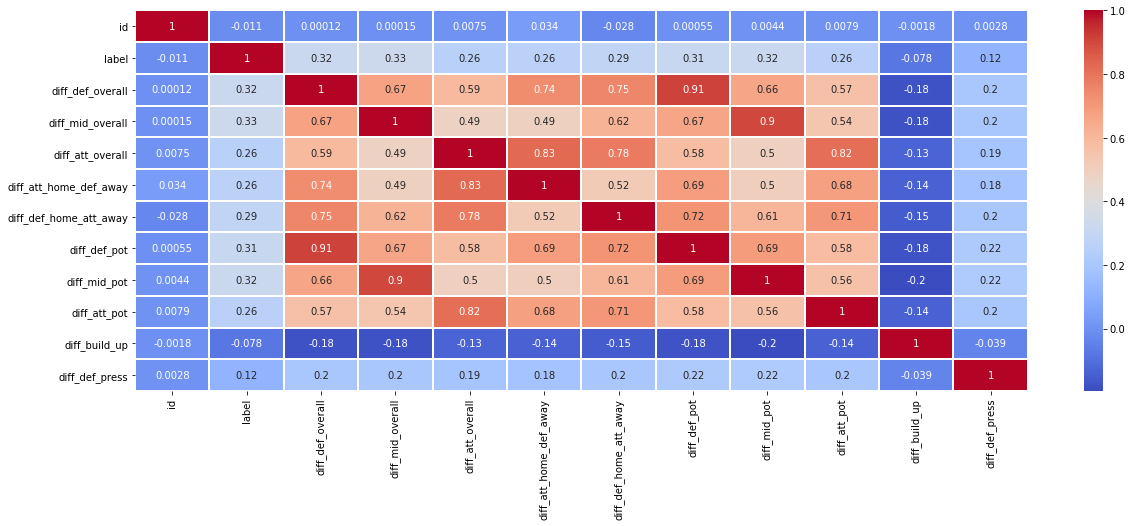

In [133]:
plt.figure(figsize=(20,7))
sns.heatmap(matchsTrainCopy.corr(),annot=True,cmap='coolwarm', linewidths=1)

HeatMap des valeurs numériques qu'on gardera comme features pour nos modeles

### Idées de transformation des données qui n'ont pas abouties
- Prendre des données statistiques à partir du training set comme le nombre totals des buts inscrits par une equipe , le nombre de victoire à domicile , le taux de victoire d'une équipe ou le aux de victoire d'une équipe à domicile dans les confrontations direct avec l'équipe extérieur => ces données repésentaient un risque d'overfitting c'est pourquoi cette idée n'a pas aboutie
- PCA